![Banner](./img/AI_Special_Program_Banner.jpg)


# Exercise artificial neural networks
---

### Sign Language MNIST
In this exercise, you will repeat and extend the training part of the notebook used in the teaching material by replacing the MNIST dataset with [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist). The main goal is to experiment with the MLP parameters and, most importantly, to ***evaluate*** the respective results.
* $n_h$: Number of hidden layers,
* $m_j,\>j=1,\dots,n_h$: Number of neurons in the $j$-th hidden layer,
* and other hyperparameters that have an influence on performance and training time.

After this exercise, you should have an overview of some of the most important hyperparameters for artificial neural networks and how they control the behavior of these models.

# Classification of sign language

The sign language MNIST dataset is intended as a replacement for MNIST. It also consists of images with $28 \times 28$ pixels, where each pixel is represented by a grayscale value. Therefore, we have $28 \times28=784$ *attributes* per line, so that the images are then *unrolled* into vectors of length $784$ and each is given a *class label* of $0-26$ in both the training data and the test data, corresponding to the type of sign it represents.

![American Sign Language](./img/american_sign_language.PNG "American Sign Language")

**Note**: The character for *J* and for *Z* requires a movement of the hand and can not be expressed in an image alone. Therefore, *J* and *Z* are not present in the data set. This means that the class labels **9** and **25** are not assigned!

## Read in the data record

The sign language MNIST dataset is publicly available on [Kaggle](https://www.kaggle.com/datamunge/sign-language-mnist), but we will use a subset of the data for this exercise. You can find the data in the `data` folder as a `.csv` file. We can prepare the data to match the structure of MNIST shown in the teaching material by loading it as a `pandas` data frame and transforming it into a `numpy` array:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, PredefinedSplit
%matplotlib inline
from sklearn.neural_network import MLPClassifier
import datetime as dt

In [2]:
path = 'data/sign-language-mnist_m.csv'

In [3]:
df = pd.read_csv(path, index_col=0)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
20919,0,171,173,175,179,180,181,183,184,185,...,231,231,231,231,231,232,231,230,230,230
22136,0,143,145,147,151,153,154,156,156,158,...,207,208,208,208,208,209,207,207,207,207
3263,0,174,176,176,175,177,177,178,178,177,...,212,204,204,203,203,203,202,205,203,201
2888,0,165,167,168,168,169,170,172,170,168,...,195,194,193,193,191,190,188,184,182,181
18977,0,180,180,181,183,183,183,182,183,183,...,207,205,205,205,204,202,200,198,197,195


As you can see, the images consist of 784 pixel values between 0 and 255. In contrast to tree-based models, it is very important to *normalize* the input features when using an artificial neural network. This generally makes the training process more stable and enables faster training times and earlier convergence.
> "Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1." ([Jason Brownlee](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/))

We can normalize the features and extract the feature matrix in one step:

In [6]:
X = np.array(df.drop('label', axis=1))/255
y = np.array(df['label'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [8]:
print('Train Data: Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Train Data: Rows: 5760, columns: 784


In [9]:
print('Test Data: Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Test Data: Rows: 1440, columns: 784


In addition, we want to have a **mapping** so that we can work with the letters when analyzing. You can use the following dictionary:

In [10]:
label_letter_map = {0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D', 4 : 'E', 5 : 'F',
                    6 : 'G', 7 : 'H', 8 : 'I', 10 : 'K', 11 : 'L', 12 : 'M',
                    13 : 'N', 14 : 'O', 15 : 'P', 16 : 'Q', 17 : 'R', 18 : 'S',
                    19 : 'T', 20 : 'U', 21 : 'V', 22 : 'W', 23 : 'X', 24 : 'Y'}

<h2 style="color:blue">Task 1: Visualize the fifth picture of each class and the corresponding letter</h2>

**Note:** Remember that labels 9 and 25 are missing. To replicate the code shown in the tutorial, you will need two separate indices in your `for loop`. One for the labels and one for the axis. [Enumerate](https://docs.python.org/3/library/functions.html#enumerate) might come in handy... Also, specify which *letter* is represented!

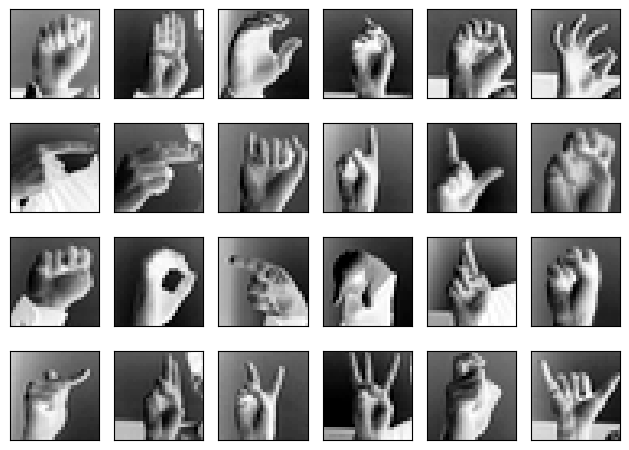

In [19]:
# Your Solution
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=4, ncols=6, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(9):
    img = X_train[y_train == i][5].reshape(28, 28) # the 5th representative of each digit
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
for i in range(10,25):
    img = X_train[y_train == i][5].reshape(28, 28) # the 5th representative of each digit
    ax[i-1].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

<h2 style="color:blue">Task 2: Visualize 25 different versions of the character for the letter L</h2>

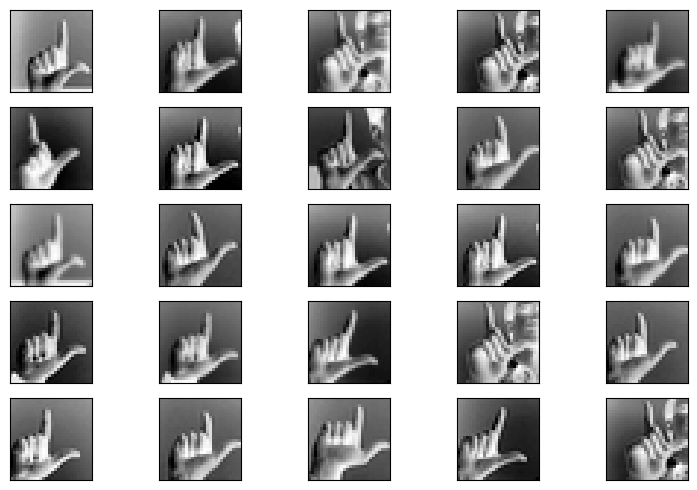

In [20]:
# Your Solution
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8, 5))
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 11][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

<h2 style="color:blue">Task 3: Classification with a multilayer perceptron</h2>

This task is about **experimenting** and **evaluating** your results! Use the `MLPClassifier` of `scikit-learn` to train different models with
* different number of hidden layers
* different number of neurons in the hidden layers
* different hyperparameters (see info below).

Try to record for each variant:

* how *long* it took to train the network
* how many epochs were necessary
* how the loss values developed over the epochs
* the accuracy
  + on the training data
  + on the test data
  
What is your **interpretation** of these experiments?

In practice, working with neural networks can be a very delicate process. These models are highly dependent on various [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and can be quite volatile. Be careful when setting the hyperparameters and do not change too many things at once.

Jason Brownlee gives a very thorough [overview](https://machinelearningmastery.com/improve-deep-learning-performance/) of different methods that can be used to improve neural networks. Not all methods are relevant here, but the section on *Algorithm Tuning* is particularly applicable in our context and worth a read. Here is a **selection of hyperparameters** that you can try out:

* **Size/complexity** of the model: reducing the number of layers and neurons will result in a less complex model and therefore faster training times. However, if the model is too simple, it may not be able to fit the data at hand, resulting in low accuracy.
* **Learning rate**: Higher learning rates reduce the convergence time of the model, but can lead to suboptimal weight updates towards the end of the learning process, which can lead to an increased bias of the model.
* **Maximum number of iterations**: This parameter allows you to force an early termination of the learning process. This is actually a good strategy to prevent overfitting, but if you stop too early, the model may not yet fit the data. Don't be afraid to try really low values!
* **Batchsize**: Larger batchsize means that fewer gradient updates are calculated, but calculating the gradient is more computationally intensive. So there is an inherent trade-off in batch size. Not only that, but different batch sizes also have an impact on model performance. Increasing the batch size may result in a solution that is closer to the true global minimum, which may actually be undesirable as the model loses its ability to generalize. On the other hand, decreasing the batch size may cause the model to get stuck at a bad local minimum early in the training process. For more information, see [Goodfellow-et-al-2016](http://www.deeplearningbook.org/contents/optimization.html).
* **Activation function**: As you know from the teaching material, there are a lot of different activation functions you can try. The *logistic function* (*sigmoid*) can sometimes be quite slow and also cause the [vanishing gradient problem](http://neuralnetworksanddeeplearning.com/chap5.html#the_vanishing_gradient_problem). It might therefore be useful to use a more modern function, such as *ReLU*.
* **Solver**: The *solver* or *optimizer* is the algorithm that updates the weights and biases (also known as the learnable parameters) of the network. *SGD* is a very robust solver with some good features, but it can be quite slow. Therefore, using a more modern solver, such as *Adam*, can speed up the training process. Jason Brownlee gives an overview in his [blog post](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

So there are many hyperparameters, but what is a good starting point? This question is not trivial to answer and is still an open research discussion. For the **start** of your training journey, you can use the *default setting* as shown in the educational material. Additionally, you can initially change the *number of hidden layers*, but keep the *total number of neurons* constant. From there, you can evaluate the results and proceed with the hyperparameter tuning instructions given above.

Also, after some testing, you can incorporate more modern "standards" into your model, as explained by [Jason Brownlee](https://machinelearningmastery.com/improve-deep-learning-performance/). The easiest ones to change are:
* *Adam* as optimizer
* *ReLu* as activation function

Can you achieve a **test accuracy of over 99%**?

In [21]:
# Your Solution
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50),
                   activation='relu', #logistic
                   solver='adam', #sgd
                   alpha=0.0001, #0.001
                   batch_size=50,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=1000,
                   verbose=False, # set to True to follow live
                   random_state=1)

In [22]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

In [23]:
print(f'It took {end-start} to train the neural network in {nn.n_iter_} epochs')

It took 0:02:58.450313 to train the neural network in 259 epochs


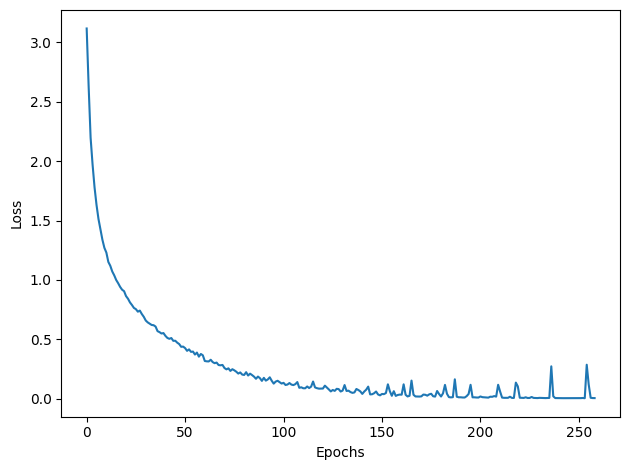

In [25]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [26]:
y_train_pred = nn.predict(X_train)

acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 100.00%


In [27]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 99.65%


In [46]:
# Your Solution
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50),
                   activation='relu', #logistic
                   solver='adam', #sgd
                   alpha=0.0001, #0.001
                   batch_size=50,
                   learning_rate='constant',
                   learning_rate_init=0.0001, #0.001
                   max_iter=1000,
                   verbose=False, # set to True to follow live
                   random_state=1)

In [47]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

In [48]:
print(f'It took {end-start} to train the neural network in {nn.n_iter_} epochs')

It took 0:05:01.010739 to train the neural network in 559 epochs


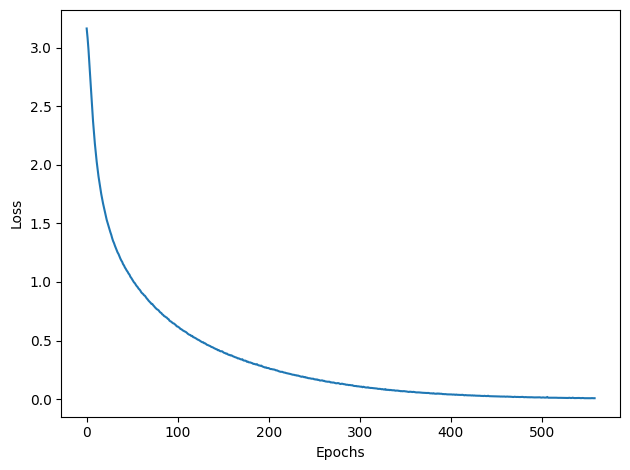

In [49]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [50]:
y_train_pred = nn.predict(X_train)

acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 100.00%


In [51]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 99.51%


<h2 style="color:blue">Task 4: Use your best model and visualize 20 misclassifications...</h2>

... and give your opinion. Use the **mapping** to make your interpretation easier!

**Note**: If your model has reached a test accuracy of 100%, you can no longer complete this task. This means that you are finished here! However, you may want to use a weaker model for the sake of interest...

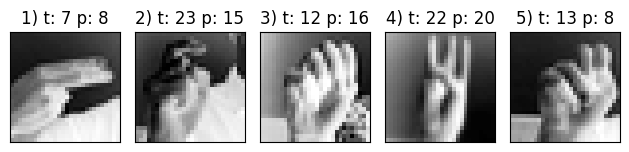

In [29]:
# Your Solution
miscl_img = X_test[y_test != y_test_pred][:5]
correct_lab = y_test[y_test != y_test_pred][:5]
miscl_lab= y_test_pred[y_test != y_test_pred][:5]

fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(5):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()